In [3]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

# Normalizacja

In [4]:
path = './results/' + 'norm.xlsx'
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])

In [5]:
df.head(2)

,net_id,n_layers,layer_types,layer_units,layer_activations,optimizer,lr,epochs_set,epochs_stop,epochs_minval,hist_min_loss_val,mae_val,nmae_val,aemin_val,aemax_val,mae_test,nmae_test,aemin_test,aemax_test,tr_time,rnd_seed,dataset_id,in_vars,timestamp,comment,opt_conf,batch_size,norm
0,1,3,"['lstm', 'lstm', 'dense']","[8, 4, 1]","['tanh', 'tanh', 'linear']",adam,0.001,250,250,249,0.038314,0.038323,0.000030,0.000025,0.499993,0.141267,0.000031,0.000010,0.780176,37.756246,0,1,"['sin_h', 'cos_h', 'sin_m', 'cos_m', 'sin_d', ...",1.734356e+09,NaN,"{'name': 'adam', 'learning_rate': 0.0010000000...",512,True True
1,2,3,"['lstm', 'lstm', 'dense']","[8, 4, 1]","['tanh', 'tanh', 'linear']",adam,0.001,250,250,249,0.039711,0.040697,0.000032,0.000001,0.478160,0.332531,0.000073,0.004503,0.843578,62.513899,0,1,"['sin_h', 'cos_h', 'sin_m', 'cos_m', 'sin_d', ...",1.734356e+09,NaN,"{'name': 'adam', 'learning_rate': 0.0010000000...",512,True True


In [6]:
norm_col = 'norm'
df['norm_in'] = df[norm_col].apply(lambda x: x.split(' ')[0])
df['norm_out'] = df[norm_col].apply(lambda x: x.split(' ')[1])

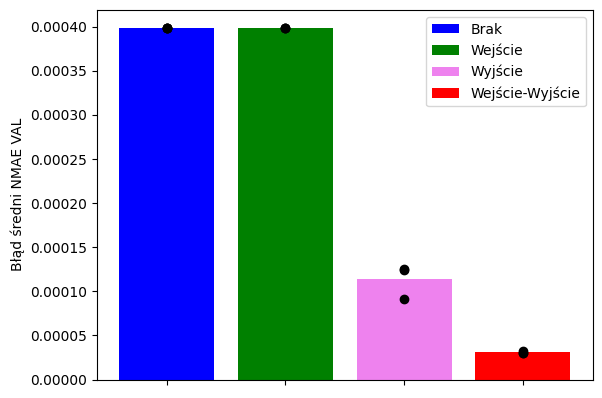

In [7]:
labels = ['brak','we','wy','we-wy']

brak = df[(df['norm_in']=='False')&(df['norm_out']=='False')]
we = df[(df['norm_in']=='True')&(df['norm_out']=='False')]
wy = df[(df['norm_in']=='False')&(df['norm_out']=='True')]
wewy = df[(df['norm_in']=='True')&(df['norm_out']=='True')]

fig = plt.figure()
labels = ['Brak','Wejście','Wyjście','Wejście-Wyjście']
c = ['blue','green','violet','red']
for i, d in enumerate([brak,we,wy,wewy]):
    plt.bar(i, np.mean(d['nmae_val']), label=labels[i], color=c[i])
    plt.scatter(np.repeat(i,len(d)), d['nmae_val'], c ='black')
plt.xticks([0,1,2,3])
plt.gca().set_xticklabels([])
plt.ylabel("Błąd średni NMAE VAL")
#plt.title("Błąd NMAE w zależności od normalizacji wartości wejściowych i wyjściowych")
plt.legend()
fig.savefig('./plots/norm.svg', bbox_inches='tight')
plt.show()

# 1

In [7]:
path = './results/' + "ResData_2024_12_13-10_08_44_880927f540ec47fb9ec89ddfc893d133.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[df['net_id'].between(2,10)]
df.head(2)


,net_id,n_layers,layer_types,layer_units,layer_activations,optimizer,lr,epochs_set,epochs_stop,epochs_minval,hist_min_loss_val,mae_val,nmae_val,aemin_val,aemax_val,mae_test,nmae_test,aemin_test,aemax_test,tr_time,rnd_seed,dataset_id,in_vars,timestamp,comment,opt_conf,batch_size
1,2,3,"['lstm', 'lstm', 'dense']","[60, 30, 1]","['sigmoid', 'sigmoid', 'linear']",Adam,0.0025,250,250,250,0.042672,0.042672,0.000034,0.000053,0.417884,0.086807,0.000019,0.000040,0.422558,59.642625,0,1,"['sin_h', 'cos_h', 'sin_m', 'cos_m', 'sin_d', ...",1.734076e+09,NaN,"{'name': 'Adam', 'learning_rate': 0.0025, 'dec...",256
2,3,3,"['lstm', 'lstm', 'dense']","[60, 30, 1]","['sigmoid', 'sigmoid', 'linear']",Adam,0.0045,250,250,241,0.034588,0.034800,0.000028,0.000012,0.588833,0.062744,0.000014,0.000005,0.486479,53.085928,0,1,"['sin_h', 'cos_h', 'sin_m', 'cos_m', 'sin_d', ...",1.734076e+09,NaN,"{'name': 'Adam', 'learning_rate': 0.0045, 'dec...",256


In [8]:
df['l1act'] = df['layer_activations'].apply(lambda x: x.split(',')[0][2:-1])
df['l1act']


1    sigmoid
2    sigmoid
3    sigmoid
4       tanh
5       tanh
6     linear
7     linear
8     linear
9       relu
Name: l1act, dtype: object

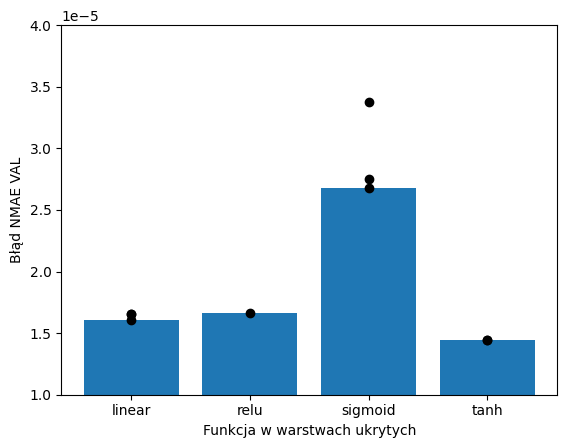

In [9]:
fig = plt.figure()
gb = df.groupby(df['l1act'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['l1act'], df['nmae_val'], c='black')
plt.ylim([1e-5,4e-5])
plt.xlabel('Funkcja w warstwach ukrytych')
plt.ylabel("Błąd NMAE VAL")
fig.savefig("./plots/fact.svg", bbox_inches='tight')

# K1

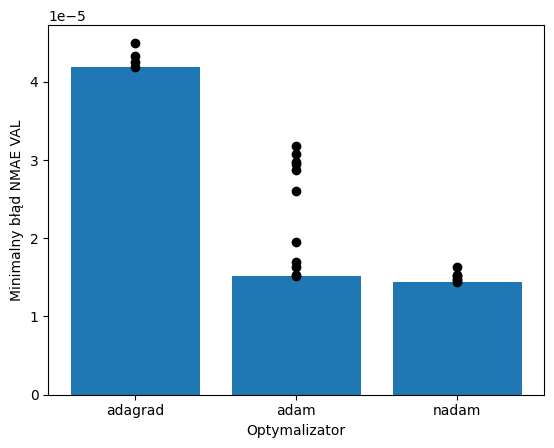

In [10]:
path = './results/' + "z1_k1_opt.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/1opt.svg", bbox_inches='tight')

In [11]:
d = [0.021380019, 0.0191931]
print("adam", np.mean(d), np.std(d))

d = [0.018264207, 0.02070278]
print("nadam", np.mean(d), np.std(d))

adam 0.020286559500000002 0.0010934594999999995
nadam 0.0194834935 0.0012192864999999997


# K2

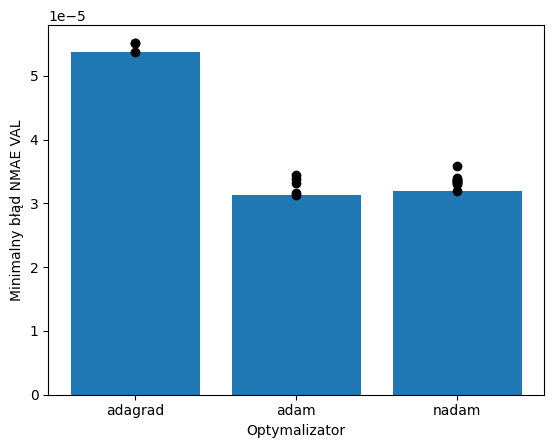

In [44]:
path = './results/' + "k2.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[(df['net_id']>=12) & (df['epochs_set']<251)]
fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/2opt.svg", bbox_inches='tight')

In [45]:
adam = df[(df['optimizer']=='adam') & (df['lr'] > 0.0049) & (df['lr'] < 0.0051)]
nadam = df[(df['optimizer']=='nadam') & (df['lr'] > 0.0044) & (df['lr'] < 0.0047)]

In [50]:
for d in [adam, nadam]:
    print(d['tr_time'].mean(), d['tr_time'].std())
    print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

52.3459632396698 7.111983291052012
0.04061009408334245 0.0012746341120424734 0.03969637676109038
53.09252103169759 3.061896078393401
0.0419566477202901 0.0014196049058300402 0.04032737955442793


In [51]:
path = './results/' + "k2_ada.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
d = df[(df['optimizer']=='adagrad')]
print(d['tr_time'].mean(), d['tr_time'].std())
print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

50.639805376529694 28.66614701540499
0.07142393736376007 0.0036188302191439165 0.06922315608290348


# K3


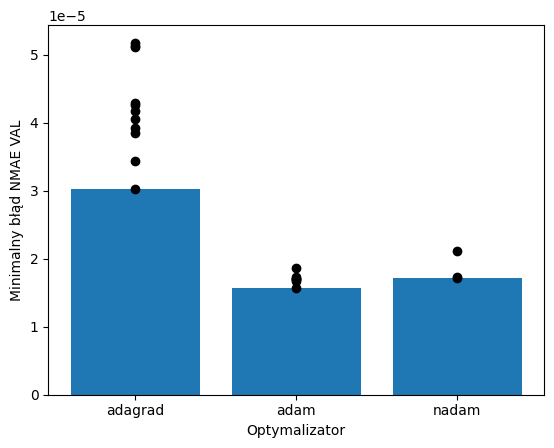

In [11]:
path = './results/' + "k3.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[(df['net_id']>=9) & (df['epochs_set']<251)]

path = './results/' + "k3_3.xlsx"
df2 = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = pd.concat([df,df2])


fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/3opt.svg", bbox_inches='tight')

In [12]:
adam = df[(df['optimizer']=='adam') & (df['lr'] > 0.0079) & (df['lr'] < 0.0081)]
nadam = df[(df['optimizer']=='nadam') & (df['lr'] > 0.0044) & (df['lr'] < 0.0047)]
ada = df[(df['optimizer']=='adagrad') & (df['lr'] > 0.0079) & (df['lr'] < 0.0081)]

In [14]:
for d in [adam, nadam, ada]:
    print(d['tr_time'].mean(), d['tr_time'].std())
    print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

87.37120691935222 7.133408049361465
0.020852663468783044 0.0008979433991231989 0.01983520842614102
80.40395514170329 7.6118771886398795
0.02348367796760342 0.0028428477442475767 0.02172857119207522
98.14964890480042 10.959409802711841
0.06498887000867977 0.0004105929584951792 0.06472011341813243


# K4

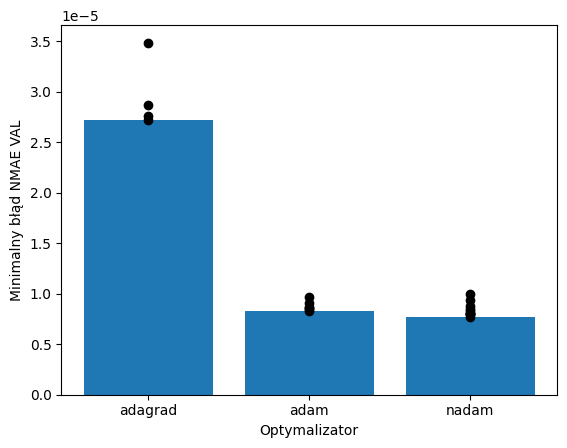

In [12]:
path = './results/' + "k4_2.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[(df['net_id']>=9) & (df['epochs_set']<251)]

fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/4opt.svg", bbox_inches='tight')

In [9]:
adam = df[(df['optimizer']=='adam') & (df['lr'] > 0.0089) & (df['lr'] < 0.0091)]
nadam = df[(df['optimizer']=='nadam') & (df['lr'] > 0.0099) & (df['lr'] < 0.0101)]
ada = df[(df['optimizer']=='adagrad') & (df['lr'] > 0.079) & (df['lr'] < 0.081)]

In [10]:
for d in [adam, nadam, ada]:
    print(d['tr_time'].mean(), d['tr_time'].std())
    print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

69.38322178522746 9.252583583733093
0.016794229380196233 0.000925213506582125 0.01588700178192649
72.3033098578453 6.76950741493471
0.014728463244799022 0.0006059594002395111 0.01407573242417151
63.891526301701866 1.8354372015641371
0.051077292566653644 0.0014308257246271319 0.04990155041080649


# K5

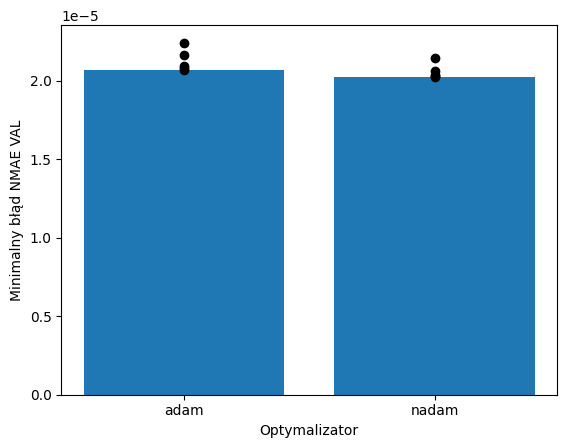

In [19]:
path = './results/' + "k5.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[(df['net_id']>=9) & (df['epochs_set']<251)]

fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/6opt.svg", bbox_inches='tight')

In [20]:
adam = df[(df['optimizer']=='adam') & (df['lr'] > 0.0064) & (df['lr'] < 0.0066)]
nadam = df[(df['optimizer']=='nadam') & (df['lr'] > 0.0079) & (df['lr'] < 0.0081)]
for d in [adam, nadam]:
    print(d['tr_time'].mean(), d['tr_time'].std())
    print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

56.6385285059611 1.2307950043631237
0.03912213248368143 0.0017890783525051563 0.03796995377426855
60.05772304534912 4.660249986901178
0.0379471182663122 0.0012291272106497461 0.03718226576465015


# K6

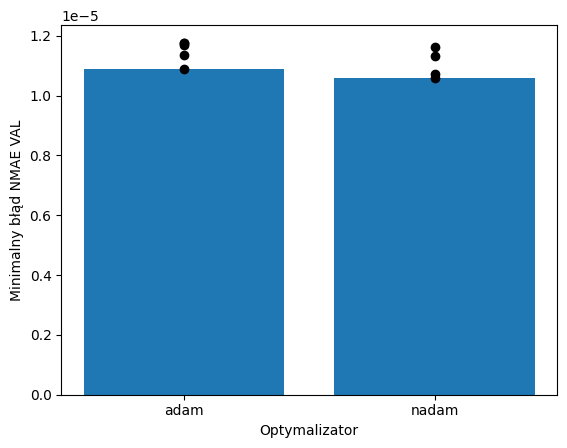

In [16]:
path = './results/' + "k6_2.xlsx"
df = pd.read_excel(path).drop(columns=['Unnamed: 0'])
df = df[(df['net_id']>=9) & (df['epochs_set']<251)]

fig = plt.figure()
gb = df.groupby(df['optimizer'])
gdf = gb.min()
plt.bar(gdf.index, gdf['nmae_val'])
plt.scatter(df['optimizer'], df['nmae_val'], c='black')
plt.xlabel('Optymalizator')
plt.ylabel("Minimalny błąd NMAE VAL")
fig.savefig("./plots/6opt.svg", bbox_inches='tight')

In [17]:
adam = df[(df['optimizer']=='adam') & (df['lr'] > 0.0069) & (df['lr'] < 0.0071)]
nadam = df[(df['optimizer']=='nadam') & (df['lr'] > 0.0079) & (df['lr'] < 0.0081)]
for d in [adam, nadam]:
    print(d['tr_time'].mean(), d['tr_time'].std())
    print(d['mae_val'].mean(), d['mae_val'].std(), d['mae_val'].min())

58.89478886127472 2.597780519319051
0.020736926098126475 0.0010214796673429748 0.02001463089850408
67.01383177439372 4.603767654977998
0.02052808430103568 0.000997921442405997 0.01941772944586294
